### Lesson 9 Assignment - Image Identification
### Lawrence Huang
##### Instructions
Using the CIFAR-10 dataset, create a new notebook to build a TensorFlow model. Perform each of the following tasks and answer the related questions:

1. Read CIFAR-10 dataset from Keras
2. Explore data
3. Preprocess and prepare data for classification
4. Build a TensorFlow model using a single dense hidden layer
5. Apply model to test set and evaluate accuracy
6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy
7. Summarize your findings regarding the different iterations and any insights gained

In [1]:
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout
import pandas as pd

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# workaround for kernel dying when running on some OS X machines
if False:
    import os
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

##### 1. Read CIFAR-10 dataset from Keras

In [3]:
# read data, split into train and test set
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


##### 2. Explore data

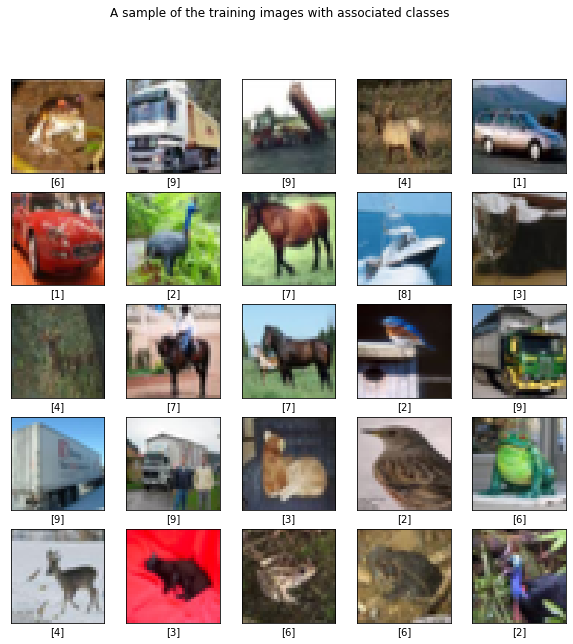

In [4]:
# explore what the data looks like by plotting some training images with their associated classes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(str(y_train[i]))
plt.suptitle('A sample of the training images with associated classes')
plt.show()

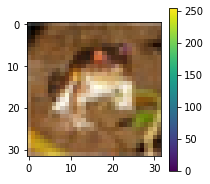

Images are 32 by 32 pixels by 3 colors (RGB)
Image scale: 0-255


In [5]:
# a closer look at an image
plt.figure(figsize=(3,3))
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
print('Images are {} by {} pixels by {} colors (RGB)'.format(x_train[0].shape[0], x_train[0].shape[1], x_train[0].shape[2]))
print('Image scale: {}-{}'.format(x_train[0].min(), x_train[0].max()))

##### 3. Preprocess and prepare data for classification

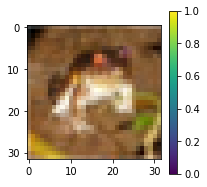

Images are 32 by 32 pixels by 3 colors (RGB)
Image scale: 0.0-1.0


In [6]:
# scale the values to range between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# check scaling
plt.figure(figsize=(3,3))
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
print('Images are {} by {} pixels by {} colors (RGB)'.format(x_train[0].shape[0], x_train[0].shape[1], x_train[0].shape[2]))
print('Image scale: {}-{}'.format(x_train[0].min(), x_train[0].max()))

##### 4. Build a TensorFlow model using a single dense hidden layer

In [7]:
# build model with single dense hidden layer
model0 = Sequential()
model0.add(Flatten(input_shape=x_train.shape[1:]))
model0.add(Dense(256, activation='relu'))
model0.add(Dense(10, activation='softmax'))

# compile model
model0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model0.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train model
model0.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 16s 394us/sample - loss: 1.9405 - acc: 0.3125 - val_loss: 1.7952 - val_acc: 0.3666
Epoch 2/15
40000/40000 [==============================] - 15s 370us/sample - loss: 1.7365 - acc: 0.3827 - val_loss: 1.7296 - val_acc: 0.3862
Epoch 3/15
40000/40000 [==============================] - 15s 368us/sample - loss: 1.6707 - acc: 0.4068 - val_loss: 1.6642 - val_acc: 0.4154
Epoch 4/15
40000/40000 [==============================] - 13s 323us/sample - loss: 1.6230 - acc: 0.4250 - val_loss: 1.6430 - val_acc: 0.4173
Epoch 5/15
40000/40000 [==============================] - 13s 317us/sample - loss: 1.5910 - acc: 0.4374 - val_loss: 1.6160 - val_acc: 0.4279
Epoch 6/15
40000/40000 [==============================] - 13s 334us/sample - loss: 1.5684 - acc: 0.4438 - val_loss: 1.6444 - val_acc: 0.4157
Epoch 7/15
40000/40000 [==============================] - 13s 318us/sample - loss: 1.5430 - acc: 0.4531 

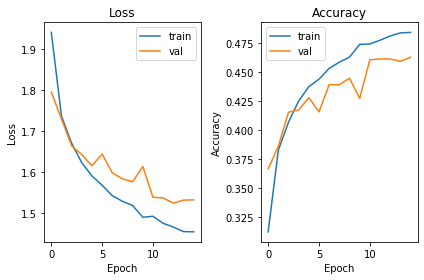

In [9]:
# plot train loss and train accuracy
def plot_loss_acc(xx):
    fig, axs = plt.subplots(1,2)
    axs[0].plot(xx.history.history['loss'], label='train')
    axs[0].plot(xx.history.history['val_loss'], label='val')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[1].plot(xx.history.history['acc'], label='train')
    axs[1].plot(xx.history.history['val_acc'], label='val')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    fig.tight_layout()
    plt.show()

plot_loss_acc(model0)

##### 5. Apply model to test set and evaluate accuracy

In [10]:
# evaluate test accuracy 
test_loss0, test_acc0 = model0.evaluate(x_test, y_test)
print('Test accuracy:', test_acc0)

10000/10000 [==============================] - 1s 51us/sample - loss: 1.5125 - acc: 0.4642
Test accuracy: 0.4642


##### 6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy

##### Adjust 1: try using tanh as the activation function for the dense hidden layer

In [11]:
# build model with single dense hidden layer
model1 = Sequential()
model1.add(Flatten(input_shape=x_train.shape[1:]))
model1.add(Dense(256, activation='tanh'))
model1.add(Dense(10, activation='softmax'))

# compile model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [12]:
# train model
model1.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 13s 323us/sample - loss: 2.0042 - acc: 0.2835 - val_loss: 1.8650 - val_acc: 0.3322
Epoch 2/15
40000/40000 [==============================] - 13s 315us/sample - loss: 1.8296 - acc: 0.3444 - val_loss: 1.8359 - val_acc: 0.3522
Epoch 3/15
40000/40000 [==============================] - 13s 317us/sample - loss: 1.7848 - acc: 0.3613 - val_loss: 1.7820 - val_acc: 0.3634 loss: 1
Epoch 4/15
40000/40000 [==============================] - 13s 316us/sample - loss: 1.7549 - acc: 0.3696 - val_loss: 1.7636 - val_acc: 0.3630
Epoch 5/15
40000/40000 [==============================] - 13s 316us/sample - loss: 1.7299 - acc: 0.3823 - val_loss: 1.7491 - val_acc: 0.3708
Epoch 6/15
40000/40000 [==============================] - 13s 316us/sample - loss: 1.7072 - acc: 0.3904 - val_loss: 1.7343 - val_acc: 0.3872
Epoch 7/15
40000/40000 [==============================] - 13s 319us/sample - loss: 1.6999 - acc:

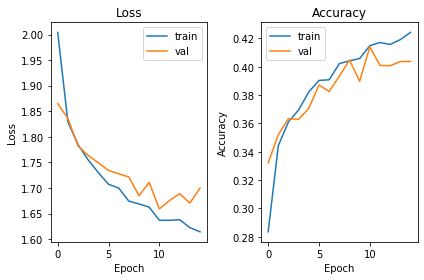

In [13]:
# plot loss array and accuracy during training
plot_loss_acc(model1)

In [14]:
# evaluate accuracy 
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc1)

10000/10000 [==============================] - 1s 55us/sample - loss: 1.6830 - acc: 0.4060
Test accuracy: 0.406


##### Try Adjust 1 again since tanh resulted in lower accuracy: change activation back to relu and add another dense layer

In [15]:
# build model with single dense hidden layer
model1 = Sequential()
model1.add(Flatten(input_shape=x_train.shape[1:]))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# compile model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
# train model
model1.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 15s 375us/sample - loss: 1.8823 - acc: 0.3224 - val_loss: 1.7934 - val_acc: 0.3582
Epoch 2/15
40000/40000 [==============================] - 16s 408us/sample - loss: 1.6849 - acc: 0.3989 - val_loss: 1.7159 - val_acc: 0.3902
Epoch 3/15
40000/40000 [==============================] - 15s 385us/sample - loss: 1.5988 - acc: 0.4280 - val_loss: 1.6275 - val_acc: 0.4198
Epoch 4/15
40000/40000 [==============================] - 15s 384us/sample - loss: 1.5500 - acc: 0.4457 - val_loss: 1.5724 - val_acc: 0.4458
Epoch 5/15
40000/40000 [==============================] - 16s 388us/sample - loss: 1.5187 - acc: 0.4544 - val_loss: 1.5524 - val_acc: 0.4493
Epoch 6/15
40000/40000 [==============================] - 14s 356us/sample - loss: 1.4854 - acc: 0.4710 - val_loss: 1.5337 - val_acc: 0.4628
Epoch 7/15
40000/40000 [==============================] - 13s 332us/sample - loss: 1.4535 - acc: 0.4782 

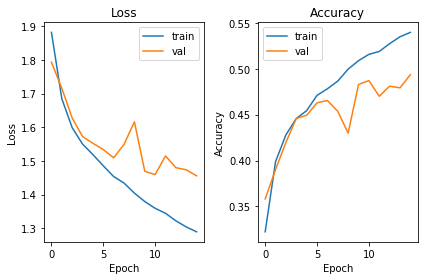

In [17]:
# plot loss array and accuracy during training
plot_loss_acc(model1)

In [18]:
# evaluate accuracy 
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc1)

10000/10000 [==============================] - 1s 58us/sample - loss: 1.4335 - acc: 0.5004
Test accuracy: 0.5004


##### Adjust 2: add convolution, max pooling, and dropout layers (instead of a dense layer)

In [19]:
model2 = Sequential()
# 32 convolution filters of size 3x3 each, followed by max pool and dropout layers
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], data_format='channels_last', activation='relu'))
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))
# flaten and add fully connected layer
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(rate=0.5))
# output
model2.add(Dense(10, activation='softmax'))

# compile model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
___________________________

In [20]:
# train model
model2.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 152s 4ms/sample - loss: 1.5567 - acc: 0.4346 - val_loss: 1.2173 - val_acc: 0.5759
Epoch 2/15
40000/40000 [==============================] - 153s 4ms/sample - loss: 1.2162 - acc: 0.5651 - val_loss: 1.0506 - val_acc: 0.6277
Epoch 3/15
40000/40000 [==============================] - 152s 4ms/sample - loss: 1.0768 - acc: 0.6215 - val_loss: 0.9741 - val_acc: 0.6571
Epoch 4/15
40000/40000 [==============================] - 152s 4ms/sample - loss: 0.9813 - acc: 0.6534 - val_loss: 0.9438 - val_acc: 0.6754
Epoch 5/15
40000/40000 [==============================] - 155s 4ms/sample - loss: 0.9058 - acc: 0.6782 - val_loss: 0.9196 - val_acc: 0.6839
Epoch 6/15
40000/40000 [==============================] - 152s 4ms/sample - loss: 0.8406 - acc: 0.7014 - val_loss: 0.8901 - val_acc: 0.6936
Epoch 7/15
40000/40000 [==============================] - 154s 4ms/sample - loss: 0.7900 - acc: 0.7184 - val_l

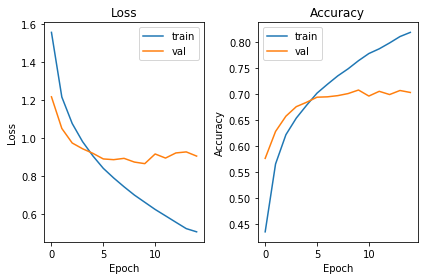

In [21]:
# plot loss array and accuracy during training
plot_loss_acc(model2)

In [22]:
# evaluate accuracy 
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc2)

10000/10000 [==============================] - 10s 1ms/sample - loss: 0.9191 - acc: 0.7067
Test accuracy: 0.7067


##### Adjust 3: add another set of convolution, max pooling, and dropout layers

In [23]:
model3 = Sequential()
# 32 convolution filters of size 3x3 each, followed by max pool and dropout layers
model3.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], data_format='channels_last', activation='relu'))
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.25))
# 64 convolution filters of size 3x3 each, followed by max pool and dropout layers
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.25))
# flaten and add fully connected layer
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(rate=0.5))
# output
model3.add(Dense(10, activation='softmax'))

# compile model 
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [24]:
# train model
model3.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 223s 6ms/sample - loss: 1.6797 - acc: 0.3846 - val_loss: 1.2969 - val_acc: 0.5401
Epoch 2/15
40000/40000 [==============================] - 220s 5ms/sample - loss: 1.2558 - acc: 0.5506 - val_loss: 1.0497 - val_acc: 0.6250
Epoch 3/15
40000/40000 [==============================] - 216s 5ms/sample - loss: 1.0764 - acc: 0.6144 - val_loss: 0.9231 - val_acc: 0.6692
Epoch 4/15
40000/40000 [==============================] - 216s 5ms/sample - loss: 0.9656 - acc: 0.6566 - val_loss: 0.8896 - val_acc: 0.6952
Epoch 5/15
40000/40000 [==============================] - 215s 5ms/sample - loss: 0.8874 - acc: 0.6906 - val_loss: 0.8031 - val_acc: 0.7175
Epoch 6/15
40000/40000 [==============================] - 221s 6ms/sample - loss: 0.8332 - acc: 0.7066 - val_loss: 0.7753 - val_acc: 0.7246
Epoch 7/15
40000/40000 [==============================] - 232s 6ms/sample - loss: 0.7851 - acc: 0.7216 - val_l

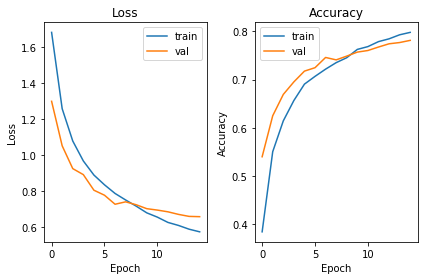

In [25]:
# plot loss array and accuracy during training
plot_loss_acc(model3)

In [26]:
# evaluate accuracy 
test_loss3, test_acc3 = model3.evaluate(x_test, y_test)
print('Test accuracy:', test_acc3)

10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6678 - acc: 0.7756
Test accuracy: 0.7756


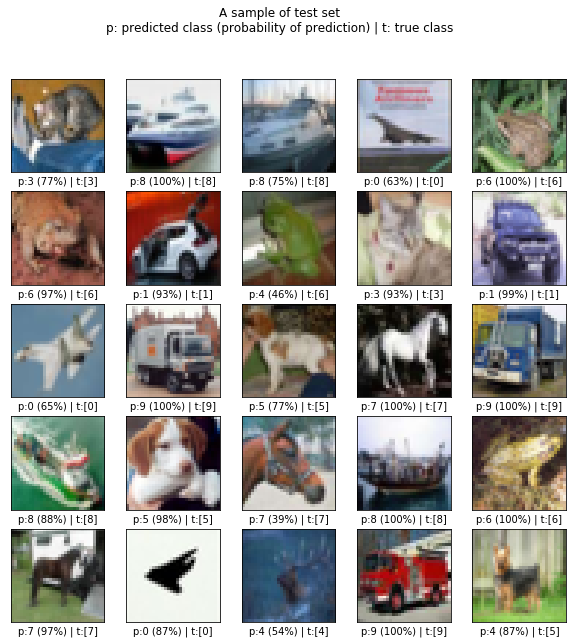

In [27]:
# plot a sample of the test set with their respective predicted class and associated probability
predictions = model3.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("p:{} ({:2.0f}%) | t:{}".format(np.argmax(predictions[i]), 100*np.max(predictions[i]), y_test[i]))
plt.suptitle('A sample of test set\np: predicted class (probability of prediction) | t: true class')    
plt.show()

In [28]:
# compare iterations
pd.DataFrame({'test loss':[test_loss0, test_loss1, test_loss2, test_loss3], 'test accuracy':[test_acc0, test_acc1, test_acc2, test_acc3]},
            index=['Model 0 (ANN 1 hidden layer)', 'Adjust 1 (+1 dense hidden layer)', 'Adjust 2 (CNN)', 'Adjust 3 (deeper CNN)'])

,test loss,test accuracy
Model 0 (ANN 1 hidden layer),1.512492,0.4642
Adjust 1 (+1 dense hidden layer),1.433533,0.5004
Adjust 2 (CNN),0.919131,0.7067
Adjust 3 (deeper CNN),0.667821,0.7756


##### 7. Summarize your findings regarding the different iterations and any insights gained
<ul>
    <li>Models were trained for 15 epochs, at which point validation loss and accuracy appeared relatively flat. Training for ~10 epochs may have resulted in less overfitting</li><p>
    <li>Model 0: a single dense hidden layer (256 units, relu) produced a relatively low accuracy (46%)</li><p>
    <li>Model 1 (Adjust 1): adjusting the activation function to tanh resulted in decreased accuracy (41%). Adjusting the activation function back to relu and adding another dense layer (256 units, relu) produced a slightly higher accuracy (50%)</li><p>
    <li>Model 2 (Adjust 2): using a convolutional neural network by adding convolution and max pooling layers (and dropout layer to reduce overfitting) produced higher accuracy compared to previous adjustments (71%). However, the larger difference (~10%) between train and validation (and test) accuracy suggest more overfitting, which was also reflected in the loss/accuracy plot</li><p>
    <li>Model 3 (Adjust 3): a deeper CNN with an additional set of convolution and max pooling layers (and dropout layer to reduce overfitting) further increased accuracy (78%), but there still appeared to be overfitting</li>
    <p>
    <li>The CNN models constructed here produced better accuracy than the ANN models. However, the tested ANN models had at most 2 hidden layers. Thus, model depth represents another variable in this exercise when comparing accuracy</li> 
</ul>